--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

--- First 5 Rows ---


,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


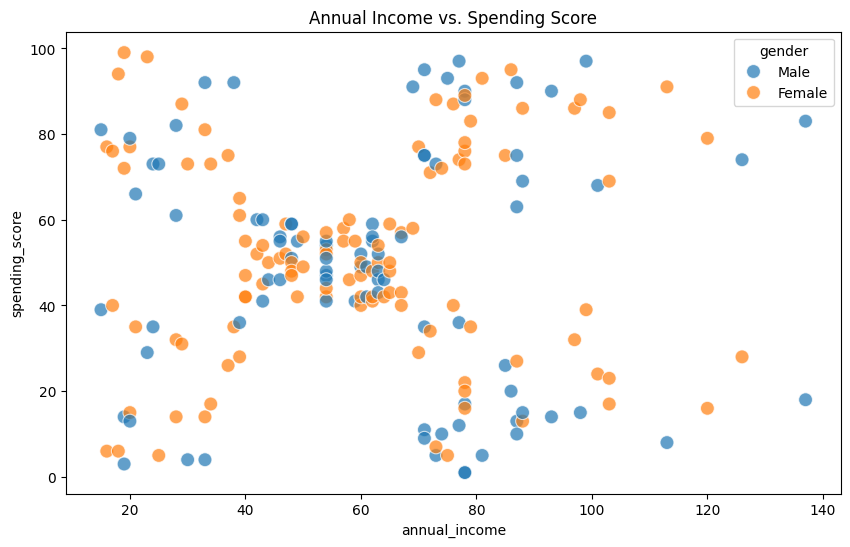

In [1]:
# In notebooks/eda.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/Mall_Customers.csv')

# Rename columns for easier access
df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
}, inplace=True)

print("--- Dataset Info ---")
df.info()

print("\n--- First 5 Rows ---")
display(df.head())

# Visualize the potential clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='gender', s=100, alpha=0.7)
plt.title('Annual Income vs. Spending Score')
plt.show()

C:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


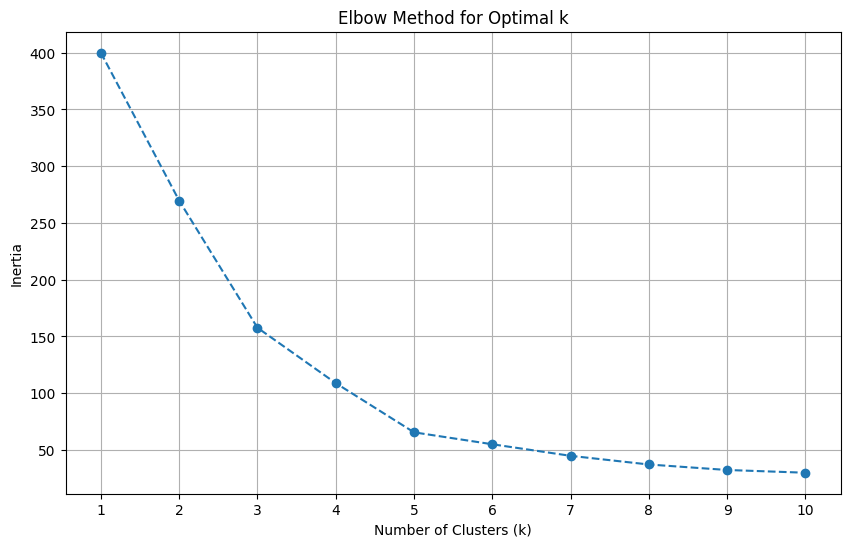

In [2]:
# In notebooks/eda.ipynb

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1. Prepare the Data for Clustering ---
# We'll use the two most predictive features: income and spending score
X = df[['annual_income', 'spending_score']]

# It's crucial to scale the data for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- 2. Run the Elbow Method ---
inertia_scores = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)


# --- 3. Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_scores, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()